# Import package

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import calendar
import numpy as np
import pandas as pd
from pylab import rcParams
from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf
from datetime import timedelta
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


#!pip install plotly
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tl
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')


# Data

In [9]:
air_visit_df = pd.read_csv('Data/air_visit_data.csv', parse_dates=['visit_date'])
air_reserve_df = pd.read_csv("Data/air_reserve.csv", parse_dates=['reserve_datetime', 'visit_datetime'])
air_store =  pd.read_csv("Data/air_store_info.csv")
holidays = pd.read_csv("Data/date_info.csv", parse_dates=['calendar_date'])
store_ids = pd.read_csv("Data/store_id_relation.csv")
test = pd.read_csv("Data/sample_submission.csv")

# Visulization

##  Air visit

We start with the number of visits to the air restaurants. Here we plot the total number of visitors per day over the full training time range:

In [11]:
air_visit_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


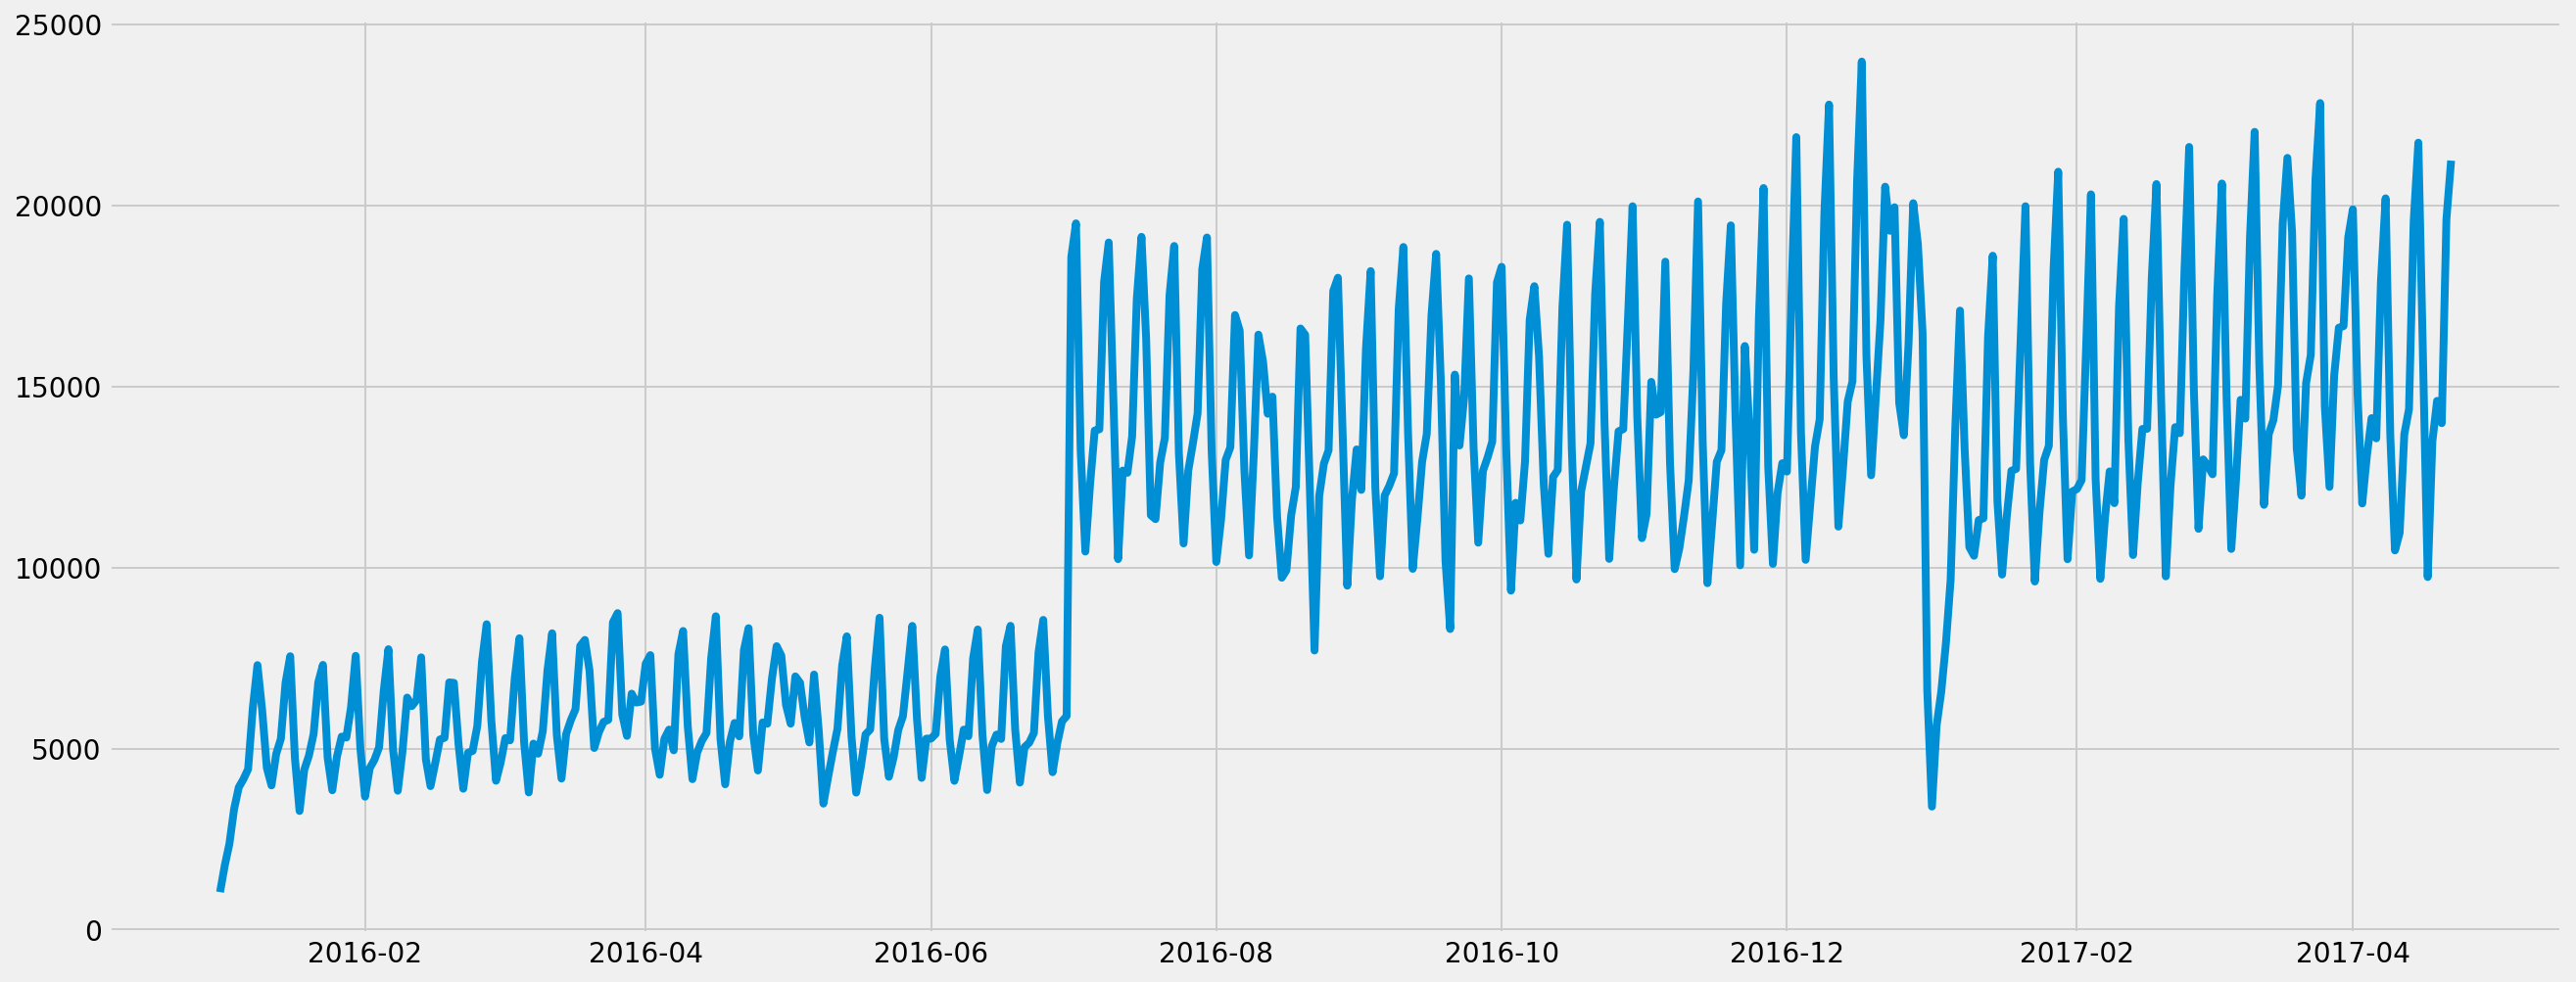

In [24]:
air_visit = air_visit_df.copy()

a=air_visit[['visit_date','visitors']].groupby(['visit_date'], as_index=False).sum()

b=air_visit[['Month', 'visitors']].groupby(['Month'],as_index=False).mean()
#Months = ['January','February','March','April','May','June','July','August','September','October','November','December']
#mapping = {Month: i for i, Month in enumerate(Months)}
#key = b['Month'].map(mapping)
#b = b.iloc[key.argsort()].set_index('Month').reset_index()

plt.figure(figsize = (20,8))
plt.plot(a['visit_date'], a['visitors'])

plt.show()

In [15]:
air_visit_idx = air_visit.set_index(['air_store_id', 'visit_date']); air_visit_idx.head()

visitors  Month  holiday_flg  dow
air_store_id         visit_date                                   
air_ba937bf13d40fb24 2016-01-13        25      1            0    3
                     2016-01-14        32      1            0    4
                     2016-01-15        29      1            0    5
                     2016-01-16        22      1            0    6
                     2016-01-18         6      1            0    1

## Air reserve 

In [12]:
air_reserve = air_reserve_df.copy()
air_reserve['diff_day'] = air_reserve['visit_datetime'].dt.date - air_reserve['reserve_datetime'].dt.date
air_reserve['diff_hr'] = air_reserve['visit_datetime'].dt.hour - air_reserve['reserve_datetime'].dt.hour
air_reserve['reserve_date'] = air_reserve['reserve_datetime'].dt.date
air_reserve['visit_date'] = air_reserve['visit_datetime'].dt.date
air_reserve = air_reserve.merge(store_ids, on='air_store_id', how='left')
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,diff_day,diff_hr,reserve_date,visit_date,hpg_store_id
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,0 days,3,2016-01-01,2016-01-01,NaN
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,0 days,0,2016-01-01,2016-01-01,hpg_bcecaa70222d94e5
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,0 days,0,2016-01-01,2016-01-01,hpg_bcecaa70222d94e5
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,0 days,4,2016-01-01,2016-01-01,NaN
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,0 days,19,2016-01-01,2016-01-01,hpg_878cc70b1abc76f7


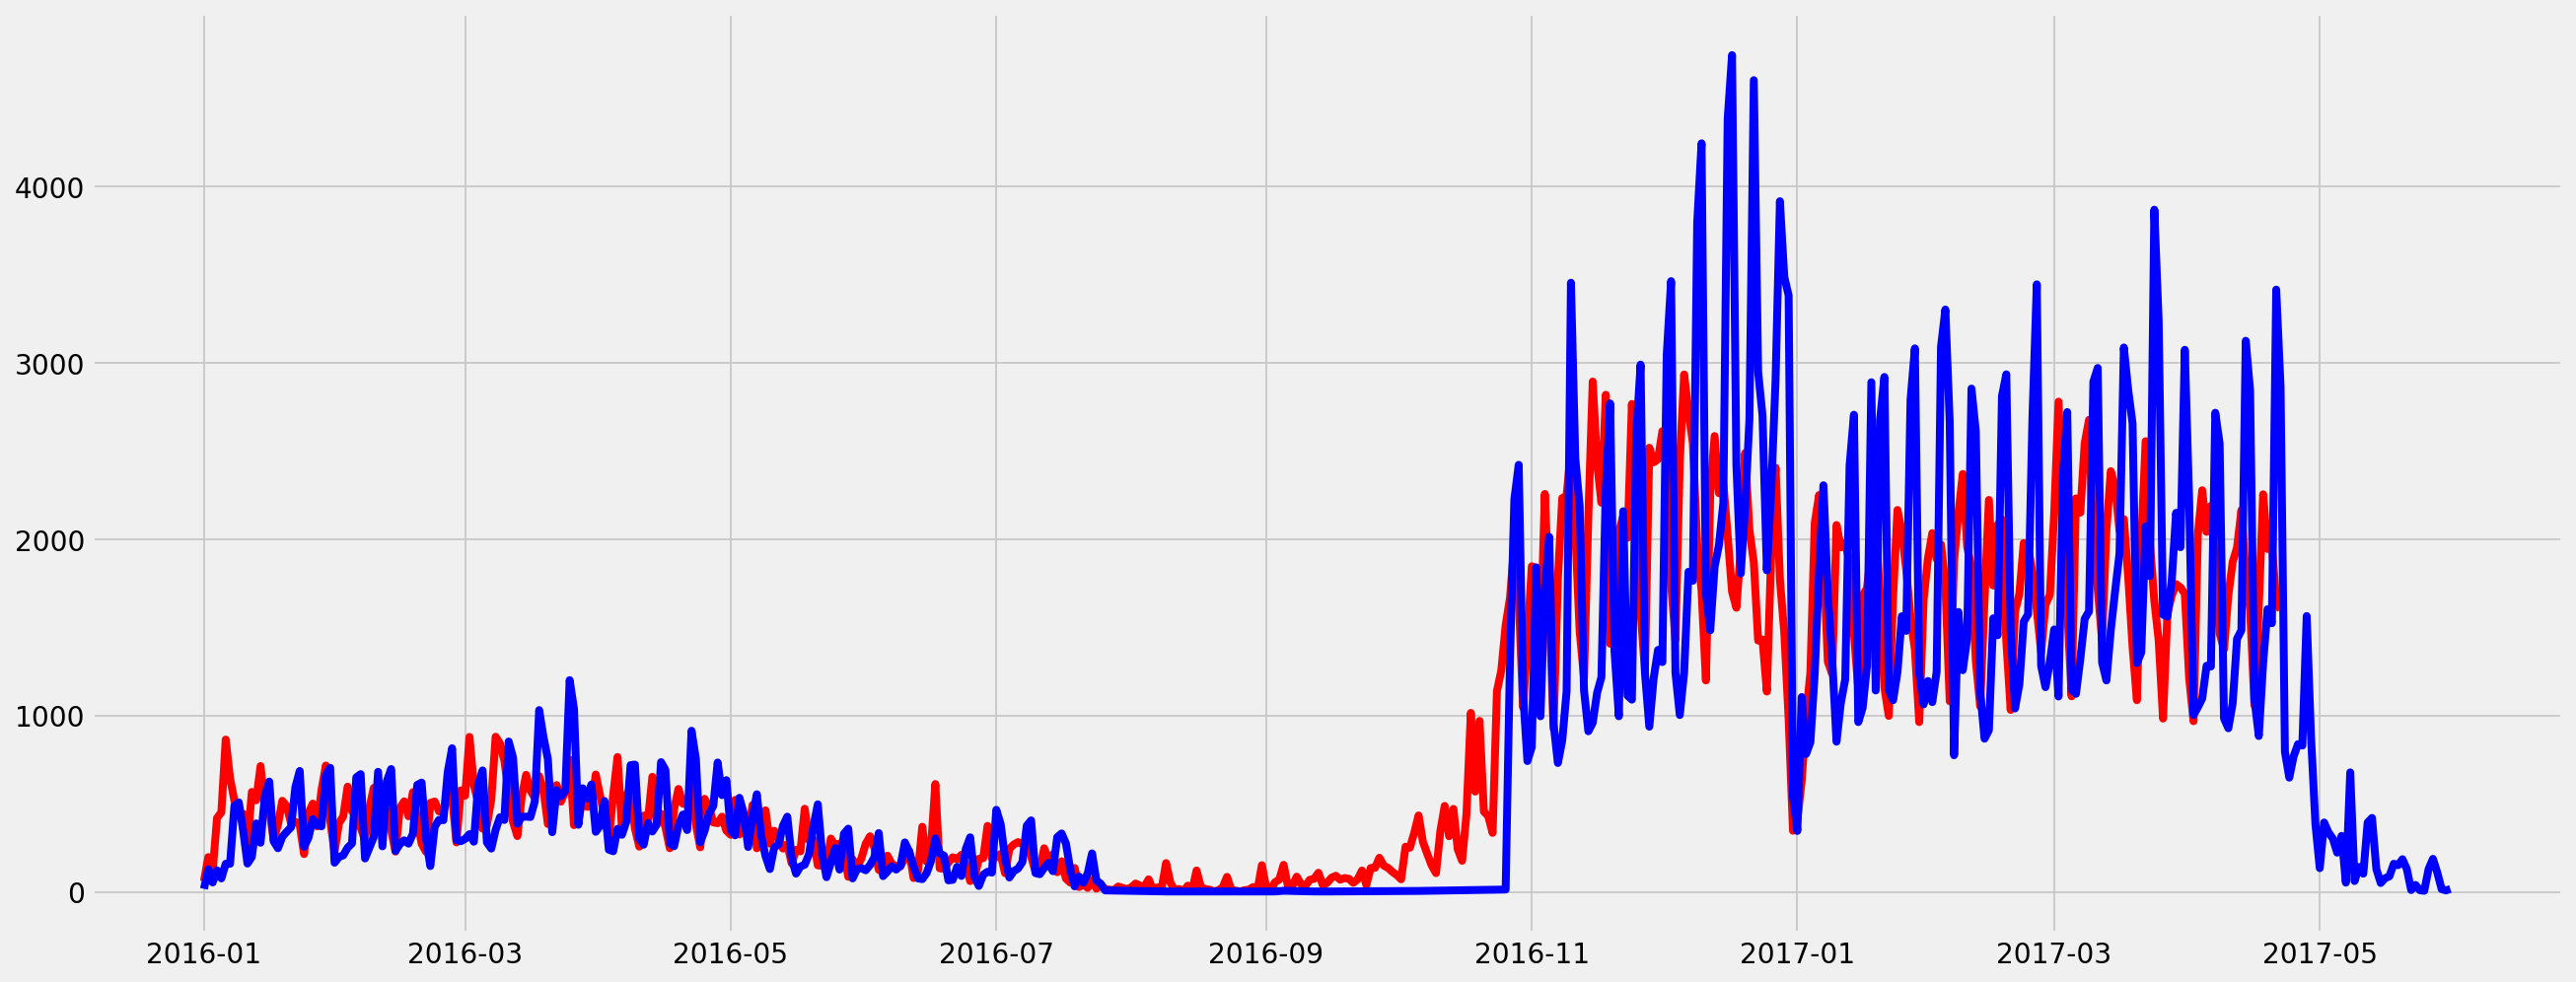

In [13]:
a1=air_reserve[['reserve_date','reserve_visitors']].groupby(['reserve_date'], as_index=False).sum()
a2=air_reserve[['visit_date','reserve_visitors']].groupby(['visit_date'], as_index=False).sum()
fig = plt.figure(figsize = (20,8))
plt.plot(a1['reserve_date'],a1['reserve_visitors'], c='red')
plt.plot(a2['visit_date'],a2['reserve_visitors'], c='blue')
plt.show()

In [14]:
air_re = air_reserve.groupby(['air_store_id','visit_date'])['reserve_visitors'].sum();air_re.head()

air_store_id          visit_date
air_00a91d42b08b08d9  2016-10-31     2
                      2016-12-05     9
                      2016-12-14    18
                      2016-12-17     2
                      2016-12-20     4
Name: reserve_visitors, dtype: int64